# AlexNet

```{note}
2012年，Alex Krizhevsky、Ilya Sutskever和Geoff Hinton提出了AlexNet，以压倒性成绩获得了当年ImageNet的冠军，引爆了这轮深度学习的热潮。
```

## 结构

AlexNet同LeNet一样，也是典型的卷积神经网络，主要不同点如下：

1.AlexNet 更深，在我们的实现中使用了5层卷积 + 3层全连接

2.AlexNet 使用ReLU代替Sigmoid

3.AlexNet 使用MaxPooling代替AvgPooling

除了网络结构之外，AlexNet能够成功的另一个重要原因就是算力的增加特别是GPU的使用使得训练深度神经网络变得可能。

下图对比了LeNet和AlexNet。

![jupyter](../images/d/alexnet.svg)

```{warning}
ImageNet中图片的典型分辨率为(3, 224, 224)<br/>
我们通过将Fashion-MNIST中图片resize到(1, 224, 224)来进行模拟
```

## 实现

In [1]:
import torch
from torch import nn


net = nn.Sequential(
    # 一开始用大kernel增加感受野和大stride降低分辨率，使用max-pooling
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
    # 全连接层 + ReLU + Dropout
    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    # Since we are using Fashion-MNIST, the number of classes is 10,
    # instead of 1000 as in the paper
    nn.Linear(4096, 10))

In [2]:
X = torch.randn(1, 1, 224, 224)
# 打印各层的shape
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 训练

In [3]:
import d2l

# 载入数据，我们通过resize来模拟ImageNet
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size, resize=224)

Traceback (most recent call last):
  File "/Users/facer/opt/anaconda3/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/Users/facer/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/facer/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/Users/facer/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

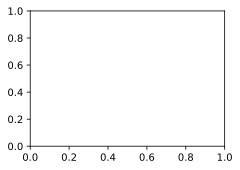

In [4]:
# 训练，没GPU就别想了*_*
lr, num_epochs = 0.01, 10
d2l.train_image_classifier(net, train_iter, test_iter, lr, num_epochs)